#  LU3MA201 : Projet / Travail d’étude et de recherche

<!-- dom:AUTHOR: Aya Bouzidi at [Sorbonne Université](http://www.sorbonne-universite.fr/), -->
<!-- Author: -->  
**Aya Bouzidi** ( L3 de Mathématiques à [Sorbonne Université](http://www.sorbonne-universite.fr/) ).

Sous la direction de : **Fréderic Nataf** ( Directeur de recherche au [Laboratoire J.L. Lions](https://www.ljll.math.upmc.fr/), [Sorbonne Université](http://www.sorbonne-universite.fr/) )

Licence <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>

# 2  Reconnaissance de chiﬀres manuscrits par la SVD

<div id="ch:method_1"></div>

La méthode de décomposition en valeurs singulières ou **SVD** (Singular Values Decomposition) est un outil assez important en apprentissage automatique. Dans ce travail, nous allons l'exploiter pour coder un deuxième algorithme de reconnaissance de chiffres manuscrits. 




**Théorème de la SVD:**

Soit $M \in \mathcal{M}_{m,n}(\mathbb{R})$ avec $m,n \in \mathbb{N}$. 

Alors il existe deux matrices othogonales $U \in \mathcal{M}_{m,m}(\mathbb{R})$ et $V \in \mathcal{M}_{n,n}(\mathbb{R})$

telles que $M=UDiag(\sigma_1,\sigma_2,...,\sigma_k)V^{t}$ avec $k=min(m,n)$ et $0 \leq \sigma_1 \leq ... \leq \sigma_k$

$\sigma_1,\sigma_2,...,\sigma_k$ s'appellent les **valeurs singulières** de $M$.







<div id="ch:method_1"></div>

**Les instructions suivantes permettent de charger les données de chiffres manuscrits disponibles dans le package mnist-original.mat :**

In [71]:
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt
mat=spi.loadmat("mnist-original.mat")
data=np.transpose(mat['data'])
label=np.array(mat['label']) #label: chiffre numérisé
label=label.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

<div id="ch:method_1"></div>

**On partage notre base de données en deux parties: la première partie servira de base d'apprentissage avec 80% de données et la deuxième partie servira de base de tests avec 20% de données.**

In [72]:
Y,y=data,label[0]
#On change l'ordre des données et des labels avec la même permutation pour que data__test et data_app soient hétérogènes...
m=np.random.permutation((len(y))) #permutation arbitraire
Y_m=Y[m] #data après permutation
y_m=y[m] #labels après permutation
n=len(Y) #nombre d'images dans la base donnée
n_80=80*n/100 #nombre d'images dans la base d'apprentissage
n_80=int(n_80)
data_app=Y_m[:n_80] #base d'apprentissage
label_app=y_m[:n_80]
data_test=Y_m[n_80:] #base de tests
label_test=y_m[n_80:]

<div id="ch:method_1"></div>

**Notre deuxième programme de classification est basé sur l'algorithme suivant:**

* **Etape 1:** Pour chaque chiffre $i$, on concaténe les vecteurs représentant $i$ dans une grande matrice $D_i$.

In [73]:
l_app=len(data_app)
l_test=len(data_test)
D_0=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==0])
D_1=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==1])
D_2=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==2])
D_3=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==3])
D_4=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==4])
D_5=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==5])
D_6=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==6])
D_7=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==7])
D_8=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==8])
D_9=np.hstack([data_app[i].reshape(-1,1) for i in range(l_app) if label_app[i]==9])

<div id="method_1"></div>

* **Etape 2:** Soit la **SVD** pour $D_i$:   $D_i=U_i \Sigma_i V_i^{t}$. Pour chaque $i \in[0,9]$, on calcule $U_i$.


In [74]:
U_0=np.linalg.svd(D_0)[0]
U_1=np.linalg.svd(D_1)[0]
U_2=np.linalg.svd(D_2)[0]
U_3=np.linalg.svd(D_3)[0]
U_4=np.linalg.svd(D_4)[0]
U_5=np.linalg.svd(D_5)[0]
U_6=np.linalg.svd(D_6)[0]
U_7=np.linalg.svd(D_7)[0]
U_8=np.linalg.svd(D_8)[0]
U_9=np.linalg.svd(D_9)[0]

<div id="method_1"></div>

**Il est intéressant de voir les images construites à partir de quelques vecteurs singuliers de $D_i$.**

**Regardons les images des dix premiers vecteurs singuliers pour chaque chiffre:**

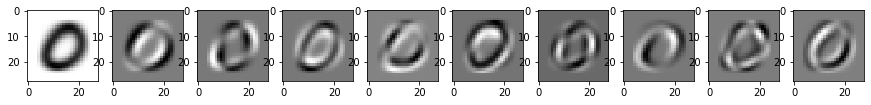

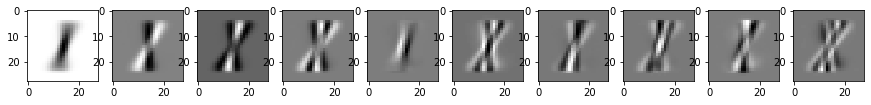

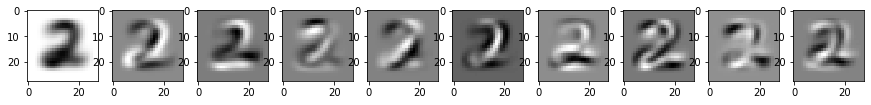

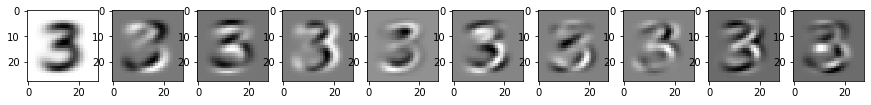

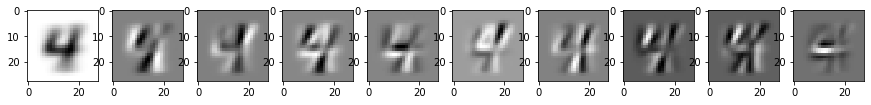

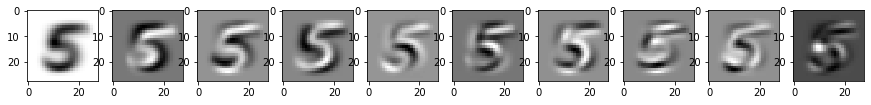

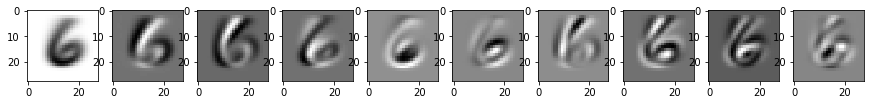

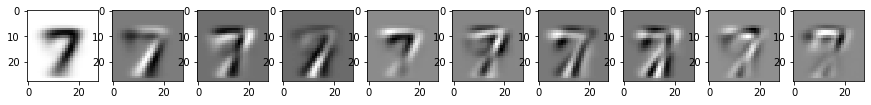

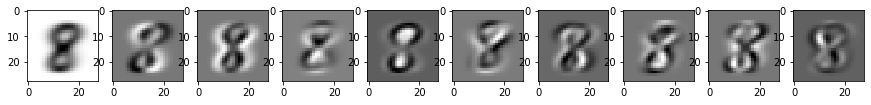

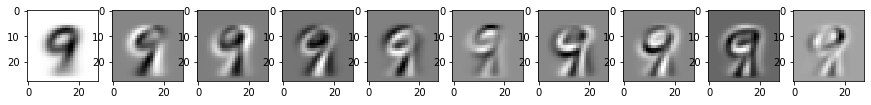

In [75]:
U=[U_0,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9]
for i in range(10):
    plt.figure(figsize=(15,2))
    for k in range(10):
        plt.subplot(1,10,k+1)
        plt.imshow(U[i][:,k].reshape(28,28),cmap='gray')

<div id="method_1"></div>

**Les premières images sont claires et il n'y a pas beaucoup de bruit. Cependant, on remarque que plus on augmente k plus le bruit augmente.**

<div id="method_1"></div>

**Regardons les images des vecteurs singuliers allant de $10$ à $20$ pour chaque chiffre:**

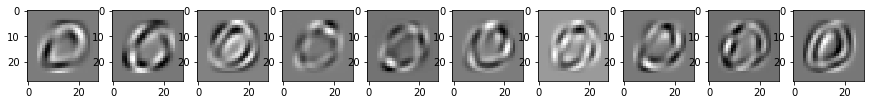

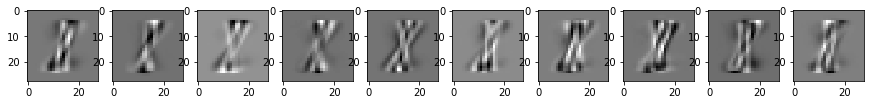

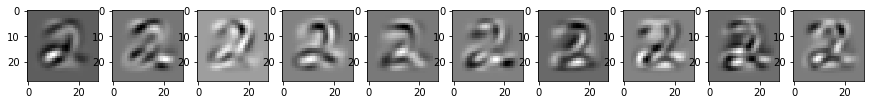

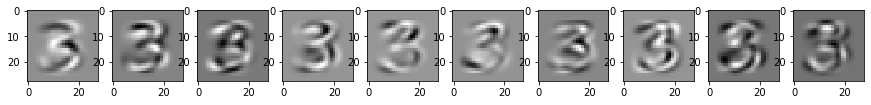

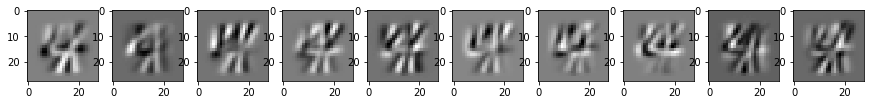

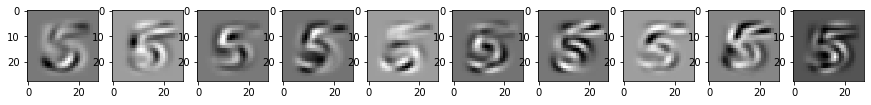

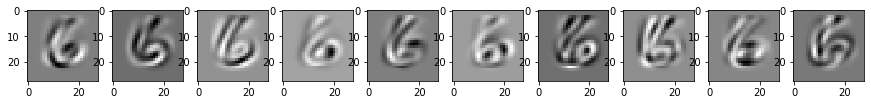

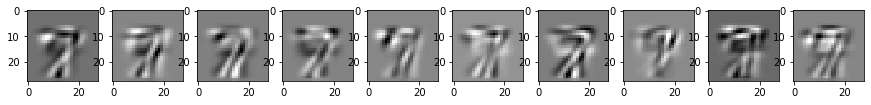

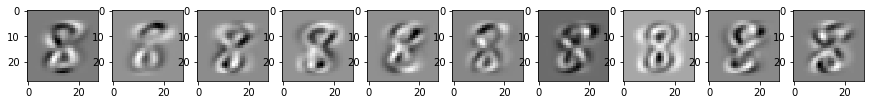

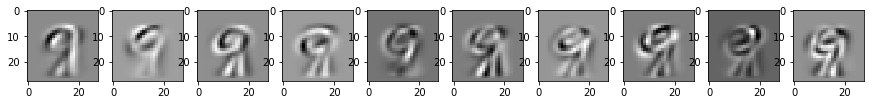

In [76]:
for i in range(10):
    plt.figure(figsize=(15,2))
    for k in range(10):
        plt.subplot(1,10,k+1)
        plt.imshow(U[i][:,k+10].reshape(28,28),cmap='gray')

<div id="method_1"></div>

**Il y a beaucoup de bruit dans ces images, et ce bruit va augmenter avec k. Pour empêcher que cela perturbe nos calculs, on choisit de travailler avec les premiers vecteurs singuliers avec moins de bruit.**

<div id="method_1"></div>

* **Etape 3:** Pour un vecteur $v$ de la base de test et pour $i \in [0.9]$, on calcule le résidu relatif $r_{i,v}=\frac{1}{||v||_2}||v-U_{i,k}U_{i,k}^tv||_2$ pour $k=10$. On classifie le $v$ au chiffre $i$ qui minimise le résidu $r_{i,v}$.

In [84]:
def estim(v):
    résidus=[np.linalg.norm(v-U[i][:,:10]@(np.transpose(U[i][:,:10])@v))/np.linalg.norm(v) for i in range(10)] 
    return résidus.index(min(résidus)) 

<div id="method_1"></div>

* **Etape 5 :** Estimation du pourcentage de prédictions correctes pour chaque chiffre.

In [85]:
def precis(j):
    list_d=[data_test[k] for k in range(l_test) if label_test[k]==j]
    a=len(list_d)
    list_la=[estim(list_d[k]) for k in range(a)]
    return list_la.count(j)/a 

In [86]:
Précisions=[precis(j) for j in range(10)]
for i in range(10):
    print("précision pour le chiffre", i ,"est de" , Précisions[i]*100, "%")
print("précision totale de la SVD est de" , sum(Précisions)*10, "%")

précision pour le chiffre 0 est de 98.25418994413407 %
précision pour le chiffre 1 est de 98.85423297262889 %
précision pour le chiffre 2 est de 92.5925925925926 %
précision pour le chiffre 3 est de 92.74136715997182 %
précision pour le chiffre 4 est de 94.68960359012715 %
précision pour le chiffre 5 est de 91.9549477071601 %
précision pour le chiffre 6 est de 96.52109548482606 %
précision pour le chiffre 7 est de 92.3562412342216 %
précision pour le chiffre 8 est de 90.14705882352942 %
précision pour le chiffre 9 est de 92.7972027972028 %
précision totale de la SVD est de 94.09085323063947 %


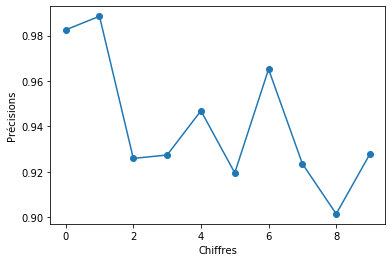

In [80]:
plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
x=[i for i in range(10)]
y=[Précisions[i] for i in range(10)]
plt.plot(x, y, marker='o')

In [ ]:
#Le chiffre 1 a la plus grande précision et 8 la plus petite précision.